### Data information 

The data we are using here is auto mpg data set which obtained in 1963 from the American Statistical Association.it describes various engine parameters related to fuel consumption in various car models from 1970-1982.


Importing libraries : 
NumPy, Pandas, Matplotlib, Seaborn and SciPy libraries are used to explore the dataset. 

In [2]:
#importe packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
    


Import data: We also import a dataset for analysis with name auto-mpg.csv 

In [3]:
# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
cars.shape

(398, 9)

The number of instances and attributes in dataset are 398 and 9


In [5]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Description of total number of columns present in dataset.  
- mpg : Miles or mileage per gallon which represents the fuel consumption of car.
- cylinders: Contains the number of cyinders present in car where fuel is combusted to generate the power.
- displacement: Overall volume of air displased by the engine (cubic inches).
- horsepower: Indicates the power of engine (horsepower).
- weight: Gross weight of car (pounds).
- acceleration: increasing speed- time to go 0-60 mph(seconds).
- model_year: year of the car model.
- origin: country of manufacture of car.
- name: Name of the car- model designation.

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

From above dataset there are 6 NAN values are present in horsepower.

In [8]:
cars = cars.dropna() # Pick out rows that contain NaN
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Descriptive statistics

#### Mode:
Mode is the value that appears more frequently in our dataset.We can calculate mode in Pandas through the function  <code>.mode()</code>

In [9]:
cars['origin'].mode() # calculate mode using Pandas

0    usa
Name: origin, dtype: object

In [10]:
cars['origin'].value_counts() # calculate mode using  NumPy

usa       245
japan      79
europe     68
Name: origin, dtype: int64

### Median:
Median is the middle value in a sorted list.The median can be calculated directly in Pandas with the <code>median()</code> function.
- If there is an odd amount of numbers present in dataset, then median is the middle value.
- If there is an even amount of numbers present in dataset, then median is the average of two middle values.

Let's calculate the median of the miles per gallon (mpg).


In [11]:
cars['mpg'].median() # calculate median using Pandas

22.75

In [12]:
np.median(cars['mpg']) # numpy

22.75

### Mean:
Mean is the average of a data set, i.e. the sum of all values ​​divided by how many values ​​are in the data set.

${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

In [13]:
cars['mpg'].mean() # calculate mean using Pandas

23.445918367346938

In [14]:
np.mean(cars['mpg']) # calculate mean using NumPy

23.445918367346938

### Variance:
The variance is a measurement of spread between numbers in a dataset.

$\,\,\,\,\,\,\,\,\,s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2$

We use $n-1$ degrees of freedom when calculating on samples, and $n$ degrees of freedom when calculating on populations. In practice, it is almost never possible to count on populations, therefore the formula $n-1$ will be by far the most common one we encounter. 


Variance can be calculated in Pandas with the <code>var()</code> function. What is the sample variance of miles per gallon (mpg) in the data set ?


In [15]:
cars['mpg'].var() # calculate variance using Pandas

60.91814186544184

In [16]:
np.var(cars['mpg'],ddof=1) # ddof in this context stands for 'delta degrees of freedom'.

60.91814186544184

### Standard deviation:
It is a measure of amount of variation or dispersion of set of data.The standard deviationvis the root of the variance : $s=\sqrt{s^2}$

Pandas also has a built-in function for standard deviation <code>std()</code> here.

In [17]:
cars['mpg'].std()# calculate standard deviation using Pandas

7.8050074865717995

In [18]:
np.std(cars['mpg'],ddof=1) # with NumPy

7.8050074865717995

Pandas has a practical function called <code>describe()</code>. This function decribes the statstics of each column of dataset.


In [107]:
cars_sat= cars.loc[:, 'mpg':'model_year']
cars_sat.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [20]:
cars_sat.describe().apply(lambda x:x.apply('{0:.2f}'.format)) # Calculate descriptive metrics in Pandas..

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


Let's make a histogram of the selected columns in our dataset.A graphical way to examine skewness is to compare the mean with the median.
- If the mean is greater than the median, the distribution is skewed to the right. 
ice versa,
- If the mean is less than the median, the distribution is skewed to the left.

 

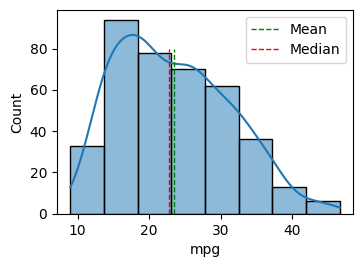

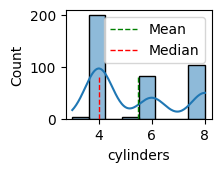

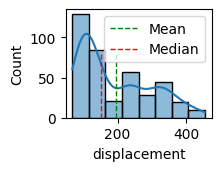

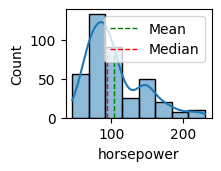

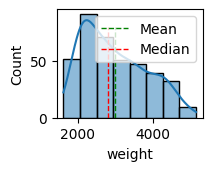

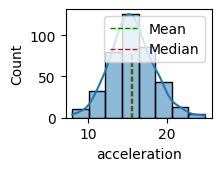

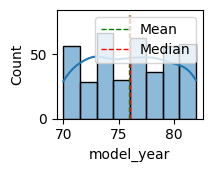

In [104]:
### Grundplot
fig= plt.figure(figsize=(13,9))

for i, x in enumerate(cars_sat):

    plt.subplot(3,3,i+1)
    sns.histplot(cars_sat[x],bins=8, kde=True)

    ### Mean och median
    mean = cars_sat[x].mean() # calculate mean for cars sats data
    median = cars_sat[x].median() # calculate median for cars sats data
    plt.plot([mean, mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Mean') # Plotta medelvärde för 'body_mass_g' med streckad grön linje
    plt.plot([median, median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plotta medianvärde för 'body_mass_g' med streckad röd linje
    
    
    ### Legend
    leg = plt.legend(loc='upper right') # Rita legend för medelvärde och median i övre högra hörnet
    plt.show()

Summary:From the plots

mpg , cylinders,displacement,horsepower, weight,acceleration,model_year: The mean is greater than the median so the distribution is thus skewed to the right, and should have a positive skewness value.


In [105]:
cars_sat.skew()# Beräkna skevhet med Pandas

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model_year      0.019688
dtype: float64

In [106]:
skewness = scs.skew(cars_sat)
skewness

array([0.45534138, 0.50616287, 0.69898128, 1.08316116, 0.51759535,
       0.29046997, 0.01961288])

skewness = 0: normally distributed

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

So all columns in the data has more weight in the left tail of the distribution.